In [651]:
# Import libraries and dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf
from yahoofinancials import YahooFinancials
import sklearn
from sklearn import linear_model
from scipy.stats import pearsonr
import math

In [712]:
# Input ticker information here (ticker 1 is lead, ticker 2 is lag)

ticker_1 = 'AMZN'
start_date_1 = '2000-01-05'
end_date_1 = '2020-01-06'

ticker_2 = 'EBAY'
start_date_2 = '2000-01-05'
end_date_2 = '2020-01-06'

In [713]:
# Pull data from Yahoo Finance
# Data contains the daily closing price of given stock

data1 = yf.download(ticker_1, start = start_date_1, end = end_date_1, auto_adjust = True, interval = '1d')
data2 = yf.download(ticker_2, start = start_date_2, end = end_date_2, auto_adjust = True, interval = '1d')

# Add a column for daily returns and drop other columns
data1['x_returns'] = data1['Close'].pct_change()
data2['y_returns'] = data2['Close'].pct_change()
data1 = data1.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
data2 = data2.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Create the 10-variable dataframe

# Daily returns of stock 1 from day 1 to day 10
data = data1
data['x1_returns'] = data['x_returns'].shift(periods = 1)
data['x2_returns'] = data['x_returns'].shift(periods = 2)
data['x3_returns'] = data['x_returns'].shift(periods = 3)
data['x4_returns'] = data['x_returns'].shift(periods = 4)
data['x5_returns'] = data['x_returns'].shift(periods = 5)
data['x6_returns'] = data['x_returns'].shift(periods = 6)
data['x7_returns'] = data['x_returns'].shift(periods = 7)
data['x8_returns'] = data['x_returns'].shift(periods = 8)
data['x9_returns'] = data['x_returns'].shift(periods = 9)
data['x10_returns'] = data['x_returns'].shift(periods = 10)

# Add daily returns of stock 2 to dataframe
data2['y_returns'] = data2['y_returns'].shift(periods = 11)
data = pd.merge(data, data2, on="Date")
data = data.iloc[20:]

data.head(15)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,x_returns,x1_returns,x2_returns,x3_returns,x4_returns,x5_returns,x6_returns,x7_returns,x8_returns,x9_returns,x10_returns,y_returns
Date,,,,,,,,,,,,
2000-02-03,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,-0.064079,-0.012478,0.129909,-0.041506,-0.030870,0.030466
2000-02-04,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,-0.064079,-0.012478,0.129909,-0.041506,0.077391
2000-02-07,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,-0.064079,-0.012478,0.129909,-0.028249
2000-02-08,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,-0.064079,-0.012478,-0.093854
2000-02-09,-0.034586,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,-0.064079,0.008249
2000-02-10,-0.050623,-0.034586,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.032787,0.116818
2000-02-11,0.000000,-0.050623,-0.034586,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.078431,0.002442
2000-02-14,-0.022970,0.000000,-0.050623,-0.034586,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.046606,-0.041413
2000-02-15,-0.008396,-0.022970,0.000000,-0.050623,-0.034586,0.108333,-0.045346,-0.066815,0.212421,0.029657,0.044530,0.016942


In [714]:
# Split data into train vs test

train_pct = 0.75 # Portion of data used to create linear regression
row = data.shape[0]
train = round(row * train_pct)

# Split the data based on train_pct
x = np.array(data.drop(['y_returns', 'x_returns'], 1))
y = np.array(data['y_returns'])
x_train = x[:train] 
x_test = x[train:]
y_train = y[:train]
y_test = y[train:]

print(row) # Total number of trading days in data
print(row - train) # Number of trading days in test portion of data

5011
1253


In [715]:
# Run the linear regression model

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

# Return regression coefficients
print("Co: ", linear.coef_)
print("Intercept: ", linear.intercept_)

Co:  [ 0.02938392 -0.00902674 -0.01389707 -0.00425365  0.02115468 -0.01931744
  0.0075515   0.02721415 -0.00700815  0.01227937]
Intercept:  0.0007440247535011777


In [716]:
# Find total returns for strategy

daily_returns = [] # Store daily returns
returns = [1] # Store cumulative returns
y_returns = np.array(data['y_returns'])
y_returns = y_returns[train:]
date = np.array(data['y_returns'].index)
date = date[train - 1:] # Store time horizon of strategy

count = 0 # Return number of days actually traded
correct = 0 # Return number of times correctly traded

for x in range(y_pred.shape[0]):
    if y_pred[x] > 0: # Long if predicted return is positive
        daily_returns.append(y_returns[x])
        returns.append(returns[-1] * (1 + y_returns[x]))
        count += 1
        if y_returns[x] > 0:
            correct += 1
    elif y_pred[x] < 0: # Short if predicted return is negative
        daily_returns.append(-1 * y_returns[x])
        returns.append(returns[-1] * (1 - y_returns[x]))
        count += 1
        if y_returns[x] < 0:
            correct += 1 
    else: # Do nothing if no trade is performed
        daily_returns.append(0)
        returns.append(returns[-1])

# Return number of trades, number of correct trades, and percent of trades correct
print('Number of trades:', count, '\nNumber of correct trades:', correct, '\nPercentage:', correct/count)

Number of trades: 1253 
Number of correct trades: 652 
Percentage: 0.5203511572226656


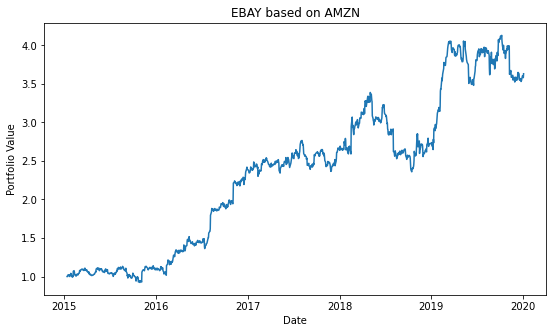

In [717]:
# Plot results

plt.figure(figsize=(9,5))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title(ticker_2 + ' based on ' + ticker_1)
plt.plot(date, returns)

In [718]:
# Calculate Sharpe ratio and return of strategy

cal = np.array(daily_returns)
sharpe = cal.mean()/cal.std() * (252 ** 0.5)

print('Sharpe ratio:', round(sharpe, 3), '\nReturn:', round(returns[-1] * 100 - 100, 2), '%')

Sharpe ratio: 1.112 
Return: 263.21 %


In [719]:
# Calculate p-value and correlation between predicted and actual returns

corr, p_val = pearsonr(y_pred, y_test)
print('Correlation:', round(corr, 4), '\nP-Value:', round(p_val, 4))

Correlation: 0.0659 
P-Value: 0.0196
